In [147]:
import pandas as pd
import numpy as np
from sklearn import *
import os 
import matplotlib.pyplot as plt
np.random.seed(32)

In [148]:
### we will enumerate through the directorsi present inside a particular directory using this 
path_parkinson_guys_1 = './Datasets/PARKINSON_HW/new_dataset/parkinson/'
path_normal_guys= './Datasets/PARKINSON_HW/hw_dataset/control/'
path_parkinson_guys_2 = './Datasets/PARKINSON_HW/hw_dataset/parkinson/'
Normal_guys = os.listdir(path_normal_guys)
Parkinson_guys_1 = os.listdir(path_parkinson_guys_1)
Parkinson_guys_2 = os.listdir(path_parkinson_guys_2)
count = 0
dataframe  = pd.DataFrame()
print(dataframe)
for file in Normal_guys:
    count  = count + 1;
    print("Appending the file = ", file)
    dataf = pd.read_csv(os.path.join(path_normal_guys, file), sep=';', header = 0)
    dataf.columns = ['x', 'y', 'z', 'pressure', 'grip_angle', 'time_stamp','test_id']
    dataframe = pd.concat([dataframe, dataf], axis=0)
    print("data frame at count = ", count)
for file in Parkinson_guys_1:
    count  = count + 1;
    print("Appending the file = ", file)
    dataf = pd.read_csv(os.path.join(path_parkinson_guys_1, file), sep=';', header = 0)
    dataf.columns = ['x', 'y', 'z', 'pressure', 'grip_angle', 'time_stamp','test_id']
    dataframe = pd.concat([dataframe, dataf], axis=0)
    print("data frame at count = ", count)
for file in Parkinson_guys_2:
    count  = count + 1;
    print("Appending the file = ", file)
    dataf = pd.read_csv(os.path.join(path_parkinson_guys_2, file), sep=';', header = 0)
    dataf.columns = ['x', 'y', 'z', 'pressure', 'grip_angle', 'time_stamp','test_id']
    dataframe = pd.concat([dataframe, dataf], axis=0)
    print("data frame at count = ", count)

Empty DataFrame
Columns: []
Index: []
Appending the file =  C_0006.txt
data frame at count =  1
Appending the file =  C_0005.txt
data frame at count =  2
Appending the file =  C_0010.txt
data frame at count =  3
Appending the file =  C_0002.txt
data frame at count =  4
Appending the file =  C_0004.txt
data frame at count =  5
Appending the file =  C_0011.txt
data frame at count =  6
Appending the file =  C_0013.txt
data frame at count =  7
Appending the file =  C_0008.txt
data frame at count =  8
Appending the file =  C_0009.txt
data frame at count =  9
Appending the file =  C_0003.txt
data frame at count =  10
Appending the file =  C_0007.txt
data frame at count =  11
Appending the file =  C_0015.txt
data frame at count =  12
Appending the file =  C_0001.txt
data frame at count =  13
Appending the file =  C_0014.txt
data frame at count =  14
Appending the file =  C_0012.txt
data frame at count =  15
Appending the file =  H_P000-0007.txt
data frame at count =  16
Appending the file =  

In [149]:
display(dataframe)

,x,y,z,pressure,grip_angle,time_stamp,test_id
0,199,203,0,354,1000,1732697389,0
1,199,203,0,373,990,1732697396,0
2,199,203,0,418,990,1732697403,0
3,199,203,0,446,980,1732697410,0
4,199,203,0,459,980,1732697417,0
...,...,...,...,...,...,...,...
8076,337,232,978,0,1090,12588892,2
8077,338,233,978,0,1030,12588901,2
8078,340,234,994,0,840,12588910,2
8079,341,236,994,0,490,12588919,2


In [150]:
df = dataframe[["pressure", "grip_angle", "test_id"]]
display(df)

,pressure,grip_angle,test_id
0,354,1000,0
1,373,990,0
2,418,990,0
3,446,980,0
4,459,980,0
...,...,...,...
8076,0,1090,2
8077,0,1030,2
8078,0,840,2
8079,0,490,2


In [151]:
def min_max_scale(df, column):
    df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())
    return df

In [152]:
def z_scale(df, column):
    print(column)
    df[column] = (df[column] - df[column].mean())/(df[column].std())
    return df

In [153]:
# min_max_scale(df, 'pressure')
# min_max_scale(df, 'grip_angle')
z_scale(df, 'pressure')
z_scale(df, 'grip_angle')

pressure
grip_angle


/tmp/ipykernel_40006/2849753420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = (df[column] - df[column].mean())/(df[column].std())


,pressure,grip_angle,test_id
0,-1.034827,-0.488582,0
1,-0.965583,-0.508865,0
2,-0.801585,-0.508865,0
3,-0.699542,-0.529148,0
4,-0.652164,-0.529148,0
...,...,...,...
8076,-2.324948,-0.306034,2
8077,-2.324948,-0.427732,2
8078,-2.324948,-0.813111,2
8079,-2.324948,-1.523018,2


In [154]:
df.mean()
df.std()

pressure      1.000000
grip_angle    1.000000
test_id       0.766761
dtype: float64

In [155]:
#time to scatter plot the data
set_0 = df.loc[df['test_id'] == 0]
set_1  = df.loc[df['test_id'] == 1]
set_2 = df.loc[df['test_id'] == 2]
set_0_sampled_train,set_0_test  =  model_selection.train_test_split(set_0, test_size = 0.001)
set_2_sampled_train,set_2_test  =  model_selection.train_test_split(set_2, test_size = 0.001)
set_1_sampled_train,set_1_test  =  model_selection.train_test_split(set_1, test_size = 0.001)

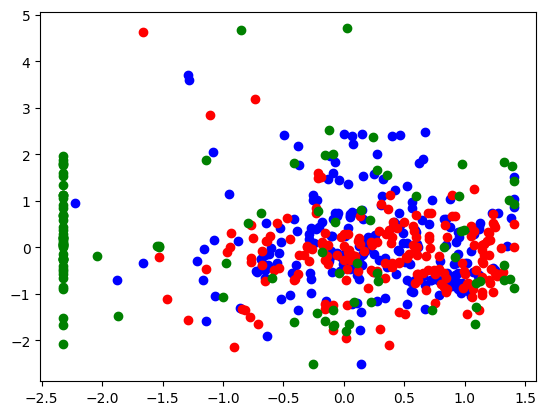

In [156]:
plt.scatter(set_0_test['pressure'], set_0_test['grip_angle'], color ='b')
plt.scatter(set_1_test['pressure'], set_1_test['grip_angle'], color ='r')
plt.scatter(set_2_test['pressure'], set_2_test['grip_angle'], color ='g')
plt.show()

In [157]:
#now plot the naive bayes classifer
from matplotlib import test
import sklearn


X_data = df[['pressure' , 'grip_angle']]
y_data = df['test_id']
X_data.to_numpy()
y_data.to_numpy()
X_train,X_test, y_train, y_test =  model_selection.train_test_split(X_data, y_data, test_size = 0.5, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(262333, 2)
(262333,)
(262333, 2)


In [158]:
model = naive_bayes.GaussianNB()
model.fit(X_train, y_train)
op = model.predict(X_test)
metrics.explained_variance_score(y_test, op)

-0.24376967376502057